# Problem Statement

I am a agency of consultant company which give an advice to the houseowner to increase their sell price. And also real estate agent or broker who looking to investing to build houses and sold to make profit. I will find out which factor they need to focus in order improve the Sale price of the house. And I will also generalize model of prediction to see is it can modelize to another city or not.

**Import all necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations 

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#remove warning
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

import time
import itertools
from itertools import combinations 
import statsmodels.api as sm

**Read data into dataframe**

- load train.csv to train: use to create model and train
- load test.csv to test: use to predict value

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [3]:
#Check train data
train.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2051.000000    2051.000000     2051.000000  2051.000000   
mean   ...     93.833740      47.556802       22.571916     2.591419   
std    ...    128.549416      66.747241       59.845110    25.229615   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     547.000000      432.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2051.000000  2051.000000   2051.000000  2051.000000  2051.000000   
mean      16.511458     2.397855     51.574354     6.219893  2007.775719   
std       57.374204    37.782570    573.393985     2.744736     1.312014   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      490.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2051.000000  
mean   181469.701609  
std     79258.659352  
min     12789.000000  
25%    129825.000000  
50%    162500.000000  
75%    214000.000000  
max    611657.000000  

[8 rows x 39 columns]

In [4]:
#check test data
test.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count   879.000000  8.790000e+02   879.000000    719.000000     879.000000   
mean   1445.588168  7.165050e+08    58.270762     69.630042   10340.920364   
std     850.717105  1.889135e+08    42.211389     23.625372   10047.335167   
min       2.000000  5.263021e+08    20.000000     21.000000    1477.000000   
25%     692.500000  5.284861e+08    20.000000     59.000000    7298.500000   
50%    1435.000000  5.354542e+08    50.000000     68.000000    9453.000000   
75%    2197.000000  9.071921e+08    70.000000     80.000000   11606.500000   
max    2928.000000  1.007100e+09   190.000000    182.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count    879.000000    879.000000   879.000000      879.000000    878.000000   
mean       6.054608      5.565415  1970.533561     1984.444824    106.982916   
std        1.374756      1.128422    30.403527       20.454546    188.356829   
min        2.000000      1.000000  1880.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1954.000000     1967.000000      0.000000   
50%        6.000000      5.000000  1972.000000     1992.000000      0.000000   
75%        7.000000      6.000000  2000.000000     2003.000000    173.500000   
max       10.000000      9.000000  2010.000000     2010.000000   1378.000000   

       ...  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  \
count  ...   879.000000    879.000000     879.000000      879.000000   
mean   ...   470.832765     93.560865      47.478953       24.037543   
std    ...   213.070155    121.174306      69.209179       73.212237   
min    ...     0.000000      0.000000       0.000000        0.000000   
25%    ...   323.000000      0.000000       0.000000        0.000000   
50%    ...   473.000000      0.000000      27.000000        0.000000   
75%    ...   576.000000    171.000000      70.000000        0.000000   
max    ...  1488.000000    690.000000     742.000000     1012.000000   

       3Ssn Porch  Screen Porch   Pool Area      Misc Val     Mo Sold  \
count  879.000000    879.000000  879.000000    879.000000  879.000000   
mean     2.594994     14.813424    1.882821     48.443686    6.207053   
std     24.948416     52.975963   29.899698    549.858353    2.644097   
min      0.000000      0.000000    0.000000      0.000000    1.000000   
25%      0.000000      0.000000    0.000000      0.000000    5.000000   
50%      0.000000      0.000000    0.000000      0.000000    6.000000   
75%      0.000000      0.000000    0.000000      0.000000    8.000000   
max    360.000000    576.000000  555.000000  15500.000000   12.000000   

           Yr Sold  
count   879.000000  
mean   2007.824801  
std       1.327396  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 38 columns]

In [5]:
#Test don't have SalePrice columns

print("Train has",train.shape[1],"columns, and ",train.shape[0],"rows")
print("Test has",test.shape[1],"columns, and ",test.shape[0],"rows")

Train has 81 columns, and  2051 rows
Test has 80 columns, and  879 rows


### EDA

ID and PID don't have any effect on Sale price, So I drop it.

In [6]:
#No need to use these
train.drop(columns=['Id','PID'],axis=1,inplace=True)

In [7]:
# 81-2 = 79 columns left
# I don't drop ID of test will use to predict and submit on kaggle
train.shape

(2051, 79)

Check Null value in each columns (features)

In [8]:
columns_null = train.columns[train.isnull().any()]
train[columns_null].isnull().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

I decide to drop 5 columns due to the too much missing data **'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'**

In [9]:
#drop missing value 79 - 5 = 74 columns left on train and 
drop_cols = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']
clean_train = train.drop(drop_cols,axis=1)
clean_test = test.drop(drop_cols,axis=1)
clean_train.shape

(2051, 74)

In [10]:
#80 - 5 = 75 columns left on test
clean_test.shape

(879, 75)

**Mange missing value**

- Looking for null value in dataframe train

In [11]:
clean_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Frontage     1721 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Street           2051 non-null   object 
 5   Lot Shape        2051 non-null   object 
 6   Land Contour     2051 non-null   object 
 7   Utilities        2051 non-null   object 
 8   Lot Config       2051 non-null   object 
 9   Land Slope       2051 non-null   object 
 10  Neighborhood     2051 non-null   object 
 11  Condition 1      2051 non-null   object 
 12  Condition 2      2051 non-null   object 
 13  Bldg Type        2051 non-null   object 
 14  House Style      2051 non-null   object 
 15  Overall Qual     2051 non-null   int64  
 16  Overall Cond     2051 non-null   int64  
 17  Year Built    

- Seperating data into Categorical & Numercal type

In [12]:
#Take category type into list name category_col
category_col = list(clean_train.loc[:,clean_train.dtypes==np.object].columns)
category_col

['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Sale Type']

In [13]:
#Take numerical type into list name numerical_col
numerical_col =  list(clean_train.loc[:,clean_train.dtypes!=np.object].columns)
numerical_col

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

In [14]:
#Due to testfile don't have SalePrice column I create numercal without the salesprice list to use later
numerical_col_no_sale_price = numerical_col
numerical_col_no_sale_price.remove('SalePrice')

In [15]:
#Already remove saleprice
numerical_col_no_sale_price

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

- I manage to fill the null value 
    - categorical data - fill with 'null'
    - numerical data - fill with 0
- Print out info of both train / test there are no longer null value in it.

In [16]:
clean_train[category_col] = clean_train[category_col].fillna('null')
clean_train[numerical_col] = clean_train[numerical_col].fillna(0)
clean_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Frontage     2051 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Street           2051 non-null   object 
 5   Lot Shape        2051 non-null   object 
 6   Land Contour     2051 non-null   object 
 7   Utilities        2051 non-null   object 
 8   Lot Config       2051 non-null   object 
 9   Land Slope       2051 non-null   object 
 10  Neighborhood     2051 non-null   object 
 11  Condition 1      2051 non-null   object 
 12  Condition 2      2051 non-null   object 
 13  Bldg Type        2051 non-null   object 
 14  House Style      2051 non-null   object 
 15  Overall Qual     2051 non-null   int64  
 16  Overall Cond     2051 non-null   int64  
 17  Year Built    

In [17]:
#Clean test data
clean_test[category_col] = clean_test[category_col].fillna('null')
clean_test[numerical_col_no_sale_price] = clean_test[numerical_col_no_sale_price].fillna(0)
clean_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               879 non-null    int64  
 1   PID              879 non-null    int64  
 2   MS SubClass      879 non-null    int64  
 3   MS Zoning        879 non-null    object 
 4   Lot Frontage     879 non-null    float64
 5   Lot Area         879 non-null    int64  
 6   Street           879 non-null    object 
 7   Lot Shape        879 non-null    object 
 8   Land Contour     879 non-null    object 
 9   Utilities        879 non-null    object 
 10  Lot Config       879 non-null    object 
 11  Land Slope       879 non-null    object 
 12  Neighborhood     879 non-null    object 
 13  Condition 1      879 non-null    object 
 14  Condition 2      879 non-null    object 
 15  Bldg Type        879 non-null    object 
 16  House Style      879 non-null    object 
 17  Overall Qual    

**Feature engineer**

Therefore, have lots of numerical data. After I go through I think I will do feature engineering to reduce the number of features.
   1. Total SF = Total Bsmt SF + 1st Flr SF + 2nd Flr SF<br>
       These 3 columns represent the house size therefore, I combine them into 1 name Total SF
       <br><br>
   2. age_dwelling = ((Yr Sold - Year Built)* 12) + Mo Sold<br>
       I calculate age of the house by the year sold minus year built and plus the month that sold to get the age of house in month
       
    
       
After that I add TotalSF and age_dwelling to the list of numerical_col and drop columns that no longer use.

In [18]:
#2 function which calculate Total SF and age_dwelling
def add_total_SF(df):
    df['TotalSF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']
    
def age_dwelling(df):
    df['age_dwelling'] = ((df['Yr Sold'] - df['Year Built'])*12) + df['Mo Sold']

In [19]:
#call function to add columns in dataframe both train and test
add_total_SF(clean_train)
add_total_SF(clean_test)
age_dwelling(clean_train)
age_dwelling(clean_test)

#add TotalSF and age_dwelling to name list in numerical_col
numerical_col.append('TotalSF')
numerical_col.append('age_dwelling')


- Drop columns which we already combine

In [20]:
clean_train.drop(columns=['Total Bsmt SF', '1st Flr SF', '2nd Flr SF','Yr Sold','Year Built','Mo Sold'],inplace=True)
clean_test.drop(columns=['Total Bsmt SF', '1st Flr SF', '2nd Flr SF','Yr Sold','Year Built','Mo Sold'],inplace=True)

In [21]:
#remove column name from list that have already combine in new column
numerical_col = [x for x in numerical_col if x not in ['Total Bsmt SF', '1st Flr SF', 
                                                      '2nd Flr SF','Yr Sold','Year Built','Mo Sold']]

In [22]:
#remove column name from list that have already combine in new column
numerical_col_no_sale_price = [x for x in numerical_col_no_sale_price if x not in ['Total Bsmt SF', '1st Flr SF', 
                                                      '2nd Flr SF','Yr Sold','Year Built','Mo Sold']]

In [23]:
clean_train.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0           60        RL           0.0     13517   Pave       IR1   
1           60        RL          43.0     11492   Pave       IR1   
2           20        RL          68.0      7922   Pave       Reg   
3           60        RL          73.0      9802   Pave       Reg   
4           50        RL          82.0     14235   Pave       IR1   

  Land Contour Utilities Lot Config Land Slope  ... Open Porch SF  \
0          Lvl    AllPub    CulDSac        Gtl  ...            44   
1          Lvl    AllPub    CulDSac        Gtl  ...            74   
2          Lvl    AllPub     Inside        Gtl  ...            52   
3          Lvl    AllPub     Inside        Gtl  ...             0   
4          Lvl    AllPub     Inside        Gtl  ...            59   

  Enclosed Porch 3Ssn Porch Screen Porch Pool Area  Misc Val  Sale Type  \
0              0          0            0         0         0        WD    
1              0          0            0         0         0        WD    
2              0          0            0         0         0        WD    
3              0          0            0         0         0        WD    
4              0          0            0         0         0        WD    

   SalePrice TotalSF age_dwelling  
0     130500  2204.0          411  
1     220000  3035.0          160  
2     109000  2114.0          685  
3     174000  1828.0           52  
4     138500  2121.0         1323  

[5 rows x 70 columns]

In [24]:
clean_test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           0.0      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           0.0      9500   Pave   

  Lot Shape Land Contour Utilities  ... Wood Deck SF Open Porch SF  \
0       Reg          Lvl    AllPub  ...            0            60   
1       IR1          Lvl    AllPub  ...          170             0   
2       IR1          Lvl    AllPub  ...          100            24   
3       Reg          Lvl    AllPub  ...            0             0   
4       IR1          Lvl    AllPub  ...            0            76   

  Enclosed Porch 3Ssn Porch Screen Porch Pool Area Misc Val  Sale Type  \
0            112          0            0         0        0        WD    
1              0          0            0         0        0        WD    
2              0          0            0         0        0        New   
3            184          0            0         0        0        WD    
4              0          0          185         0        0        WD    

   TotalSF  age_dwelling  
0     2948          1156  
1     3934           356  
2     2150             9  
3     1936          1015  
4     2788           559  

[5 rows x 71 columns]

---------------------------

# Exploratory Data and Some Visualizations

**Ploting co-relation numercial data type**

<AxesSubplot:>

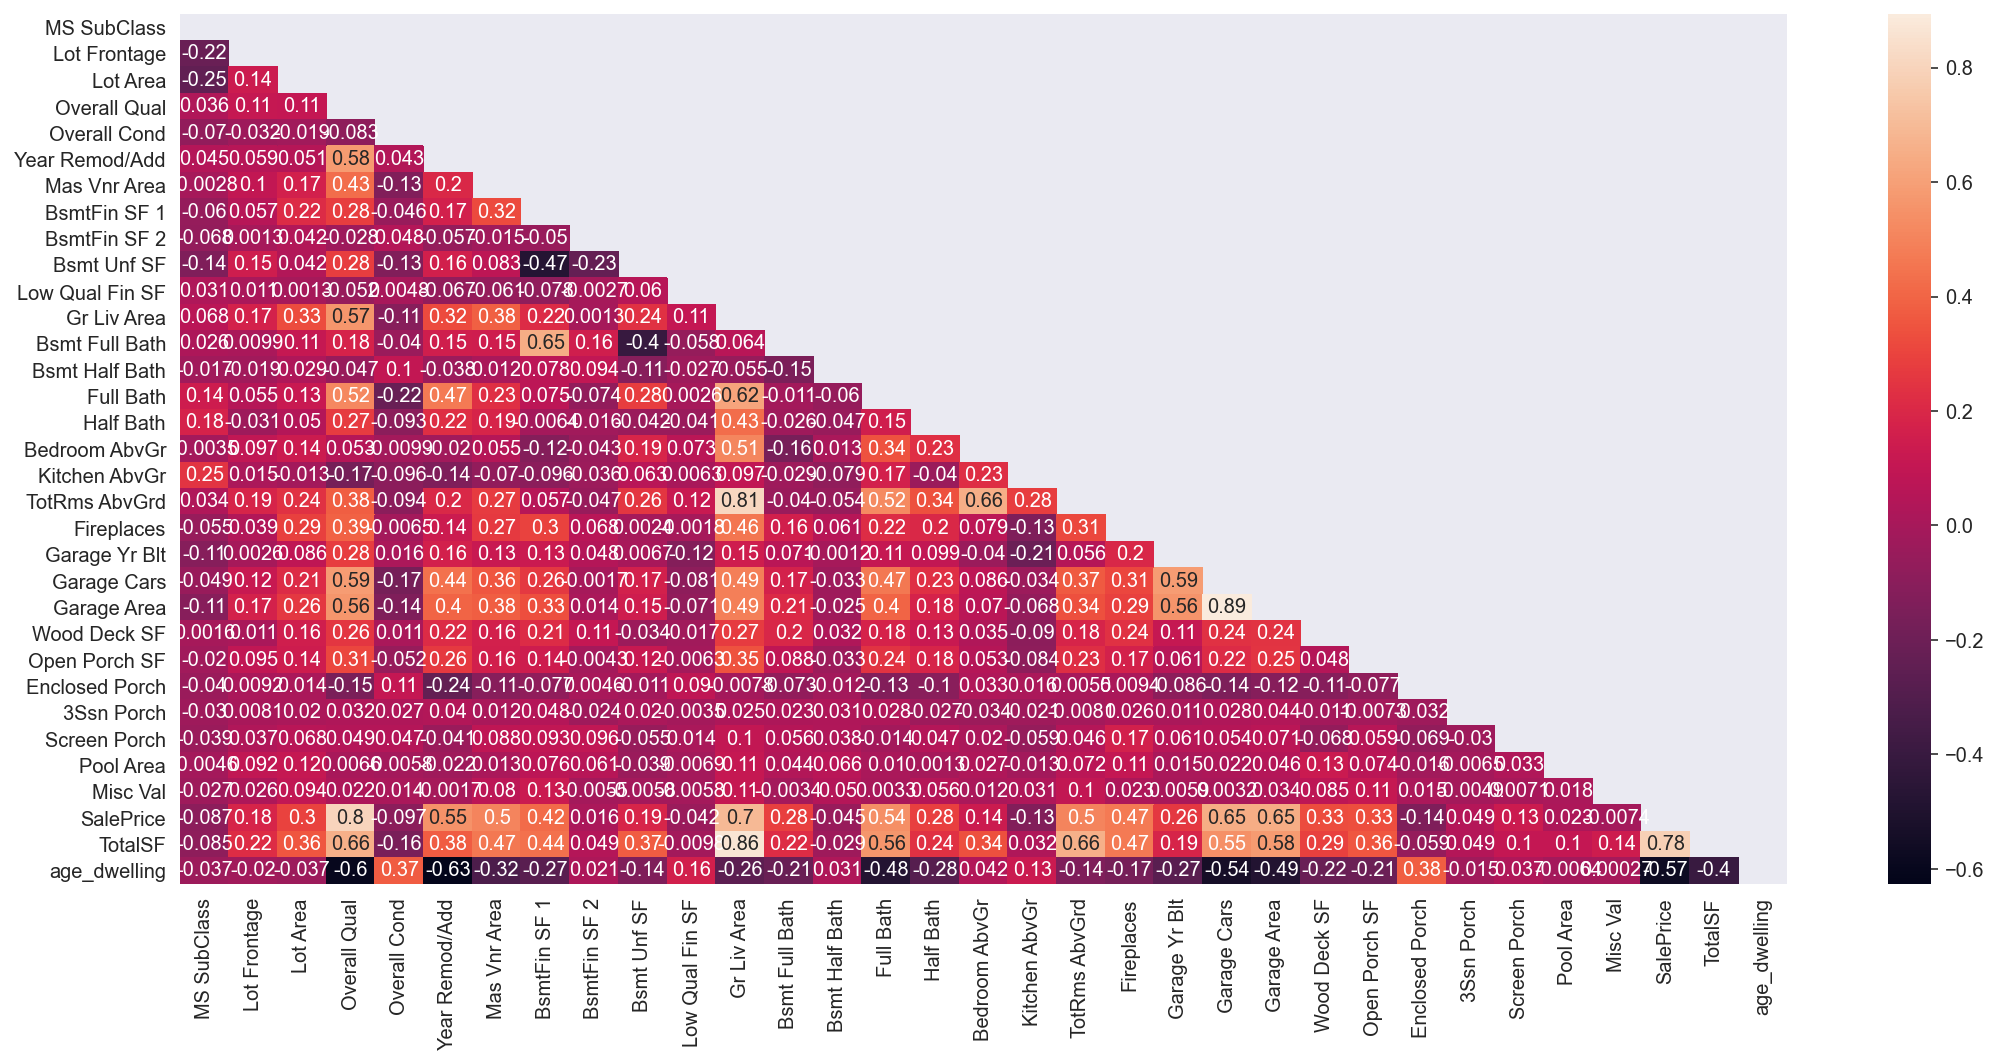

In [25]:
corr =clean_train.corr()

fig, ax = plt.subplots(figsize=(18, 8))

mask = np.zeros_like(corr) ###creating matrix of 0
mask[np.triu_indices_from(mask)] = True ### triu = triangle upper and make it one

sns.heatmap(corr,mask=mask,annot=True)

**Quite hard to look so I filtering only corelation with SalePrice**

In [26]:
#Co-relation with saleprice & numercal data
clean_train[clean_train.columns[:]].corr()['SalePrice'][:-1].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800207
TotalSF            0.783108
Gr Liv Area        0.697038
Garage Area        0.649897
Garage Cars        0.647781
Year Remod/Add     0.550370
Full Bath          0.537969
TotRms AbvGrd      0.504014
Mas Vnr Area       0.503579
Fireplaces         0.471093
BsmtFin SF 1       0.423856
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283332
Half Bath          0.283001
Garage Yr Blt      0.258645
Bsmt Unf SF        0.190861
Lot Frontage       0.181456
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Pool Area          0.023106
BsmtFin SF 2       0.016432
Misc Val          -0.007375
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045290
MS SubClass       -0.087335
Overall Cond      -0.097019
Kitchen AbvGr     -0.125444
Enclosed Porch    -0.135656
Name: SalePrice, dtype: float64

I take absolute to corelation with salesprice and sort it to see which one is most effect to SalePrice

In [27]:
#take absolute to see the significant effect on saleprice whether it's positive or negative coleration
top_corr = np.abs(clean_train.corr()[['SalePrice']]).sort_values('SalePrice', ascending=False)                                              

<AxesSubplot:>

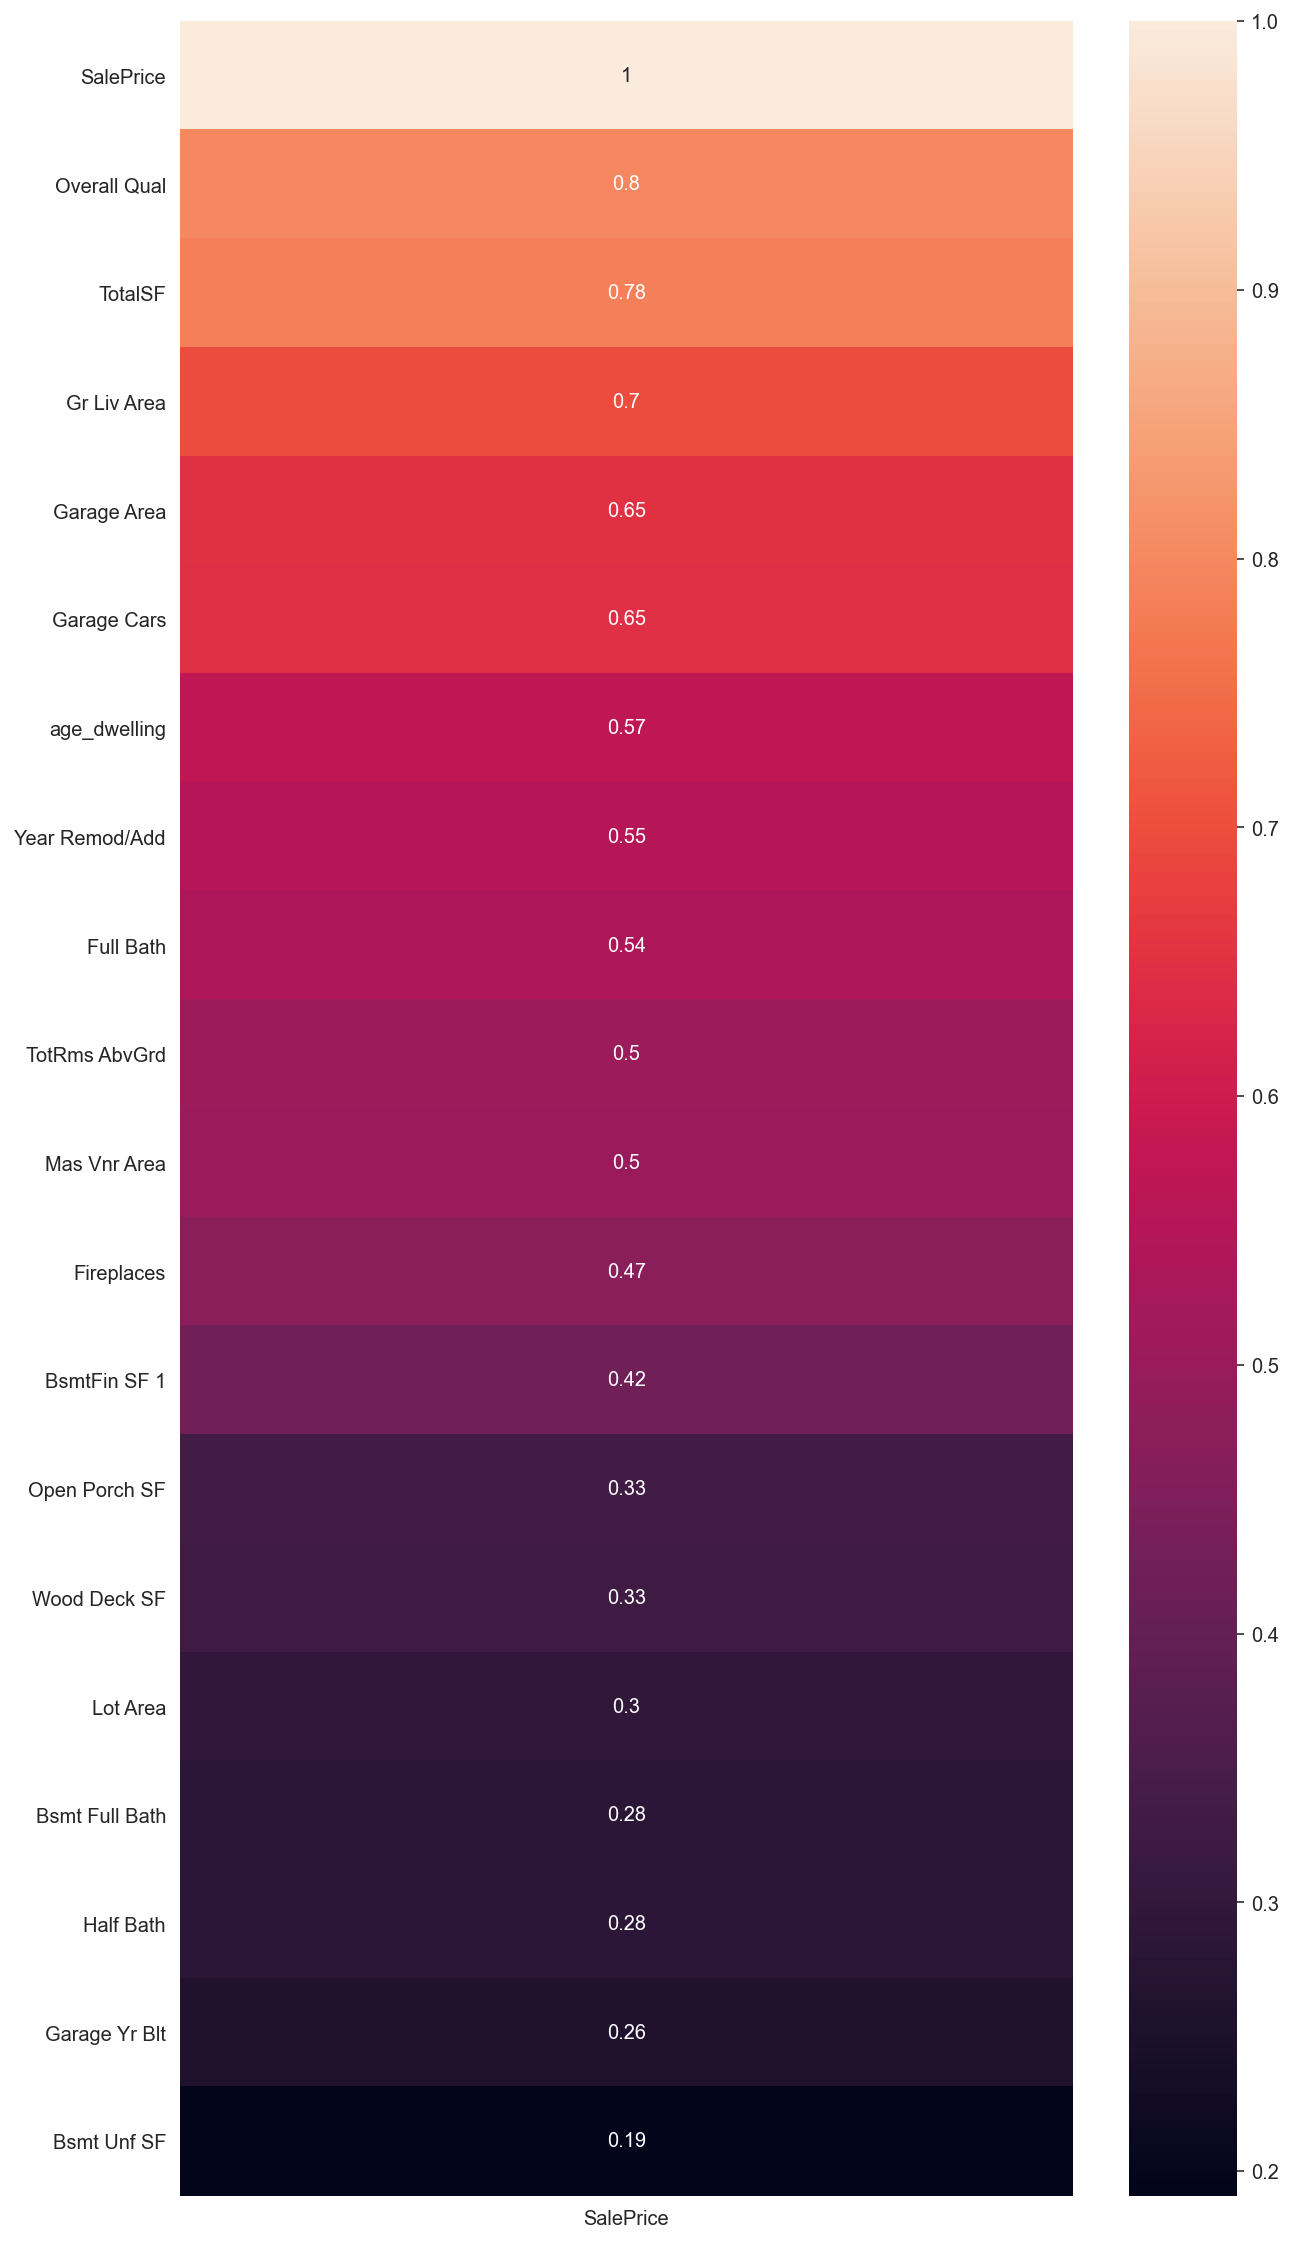

In [28]:
#Plot corelation of top co-relation
plt.figure(figsize = (10,20))
sns.heatmap(top_corr.head(20), annot = True)

**See top corelation with sales price**

In [29]:
corr_col = ['SalePrice','Overall Qual','TotalSF','Gr Liv Area','Garage Area','Garage Cars','age_dwelling']

In [30]:
clean_train[corr_col].head()

SalePrice  Overall Qual  TotalSF  Gr Liv Area  Garage Area  Garage Cars  \
0     130500             6   2204.0         1479        475.0          2.0   
1     220000             7   3035.0         2122        559.0          2.0   
2     109000             5   2114.0         1057        246.0          1.0   
3     174000             5   1828.0         1444        400.0          2.0   
4     138500             6   2121.0         1445        484.0          2.0   

   age_dwelling  
0           411  
1           160  
2           685  
3            52  
4          1323

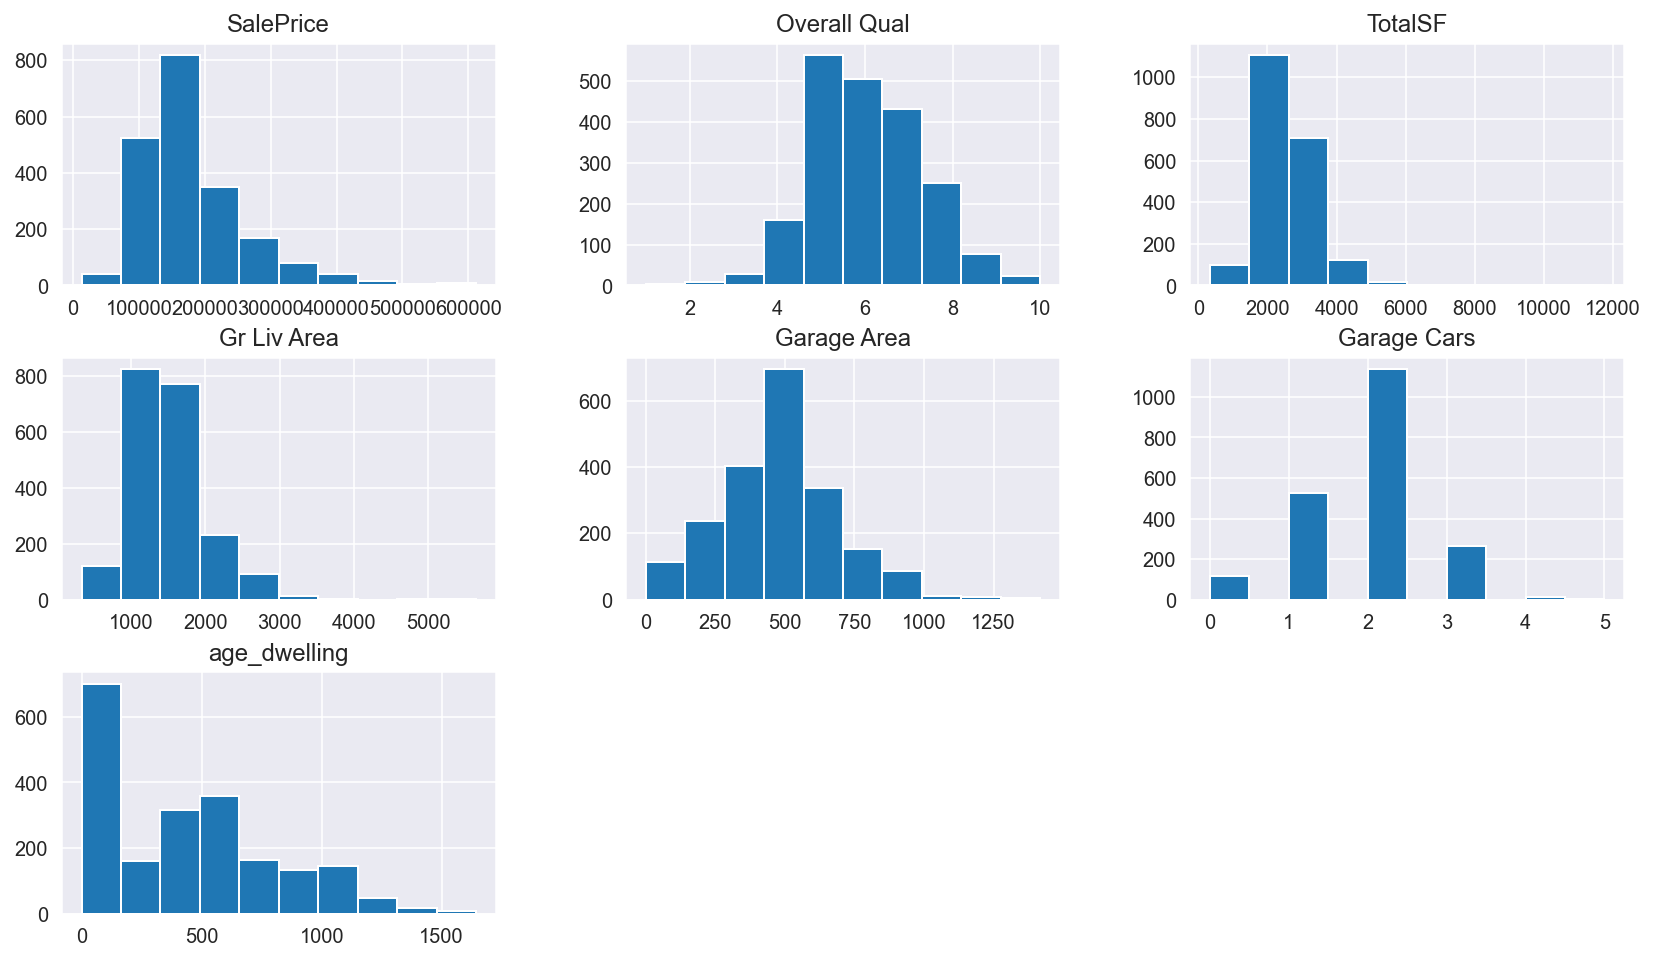

In [31]:
#See the distribution and quickly look at outliers
clean_train[corr_col].hist(figsize=(14,8));

- Plotting boxplot with categorical with sale price

In [32]:
f = pd.melt(clean_train, id_vars = 'SalePrice', value_vars = category_col)
g = sns.FacetGrid(f, col = "variable",  col_wrap = 2, sharex = False, sharey = False, size = 10)
g.map(sns.boxplot, 'value', 'SalePrice', palette = 'viridis')

### Create dummy for categorical data

In [33]:
dummy_train = pd.get_dummies(clean_train, columns=category_col) 

In [34]:
dummy_train.shape

(2051, 276)

In [35]:
all_feature = [x for x in dummy_train.columns if x != 'SalePrice']

In [36]:
all_feature

['MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'TotalSF',
 'age_dwelling',
 'MS Zoning_A (agr)',
 'MS Zoning_C (all)',
 'MS Zoning_FV',
 'MS Zoning_I (all)',
 'MS Zoning_RH',
 'MS Zoning_RL',
 'MS Zoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Lot Shape_IR1',
 'Lot Shape_IR2',
 'Lot Shape_IR3',
 'Lot Shape_Reg',
 'Land Contour_Bnk',
 'Land Contour_HLS',
 'Land Contour_Low',
 'Land Contour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'Utilities_NoSewr',
 'Lot Config_Corner',
 'Lot Config_CulDSac',
 'Lot Config_FR2',
 'Lot Config_FR3',
 'L

In [37]:
dummy_test = pd.get_dummies(clean_test, columns=category_col) 

In [38]:
dummy_test.shape

(879, 264)

As you can see columns after doing dummy of train data is 276 and test is 264 due to categorical of train and test are not the same(such as color). So I do remove the different columns to make train and test equal so that it can compare in model

In [39]:
### Some categorical not equal therefore dummy is not equal we need to fix it

In [40]:
dummy_train[all_feature].shape

(2051, 275)

In [41]:
#Take a set of different column in train and test
missing_cols = set(dummy_train.columns) - set(dummy_test.columns)

# Add a missing column in test with default value equal to 0
for c in missing_cols:
    dummy_test[c] = 0
    
# Ensure the order of columns in test is the same as in train
dummy_test = dummy_test[all_feature]

In [42]:
dummy_train.shape

(2051, 276)

In [43]:
#test not have SalePrice so it's equal now
dummy_test.shape

(879, 275)

-----------------------------------------------------------------

# Create model to predict

### Baseline model:
Baseline model will be the mean value  

In [44]:
X = dummy_train[all_feature]
y = dummy_train['SalePrice']

In [45]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [46]:
baseline_preds = np.mean(y)
baseline_preds = [baseline_preds for i in range(len(train))]

In [47]:
print(f"MSE : {mean_squared_error(y, baseline_preds)}" )
print(f"RMSE : {np.sqrt(mean_squared_error(y, baseline_preds))}" )

MSE : 6278872217.837828
RMSE : 79239.33504161824


<b>The score of baseline model</b><br>
MSE : 6278872217.837828<br>
RMSE : 79239.33504161824<br>

### Linear Regression model:

Model 1 - pick top corelation numerical feature to predict

<AxesSubplot:>

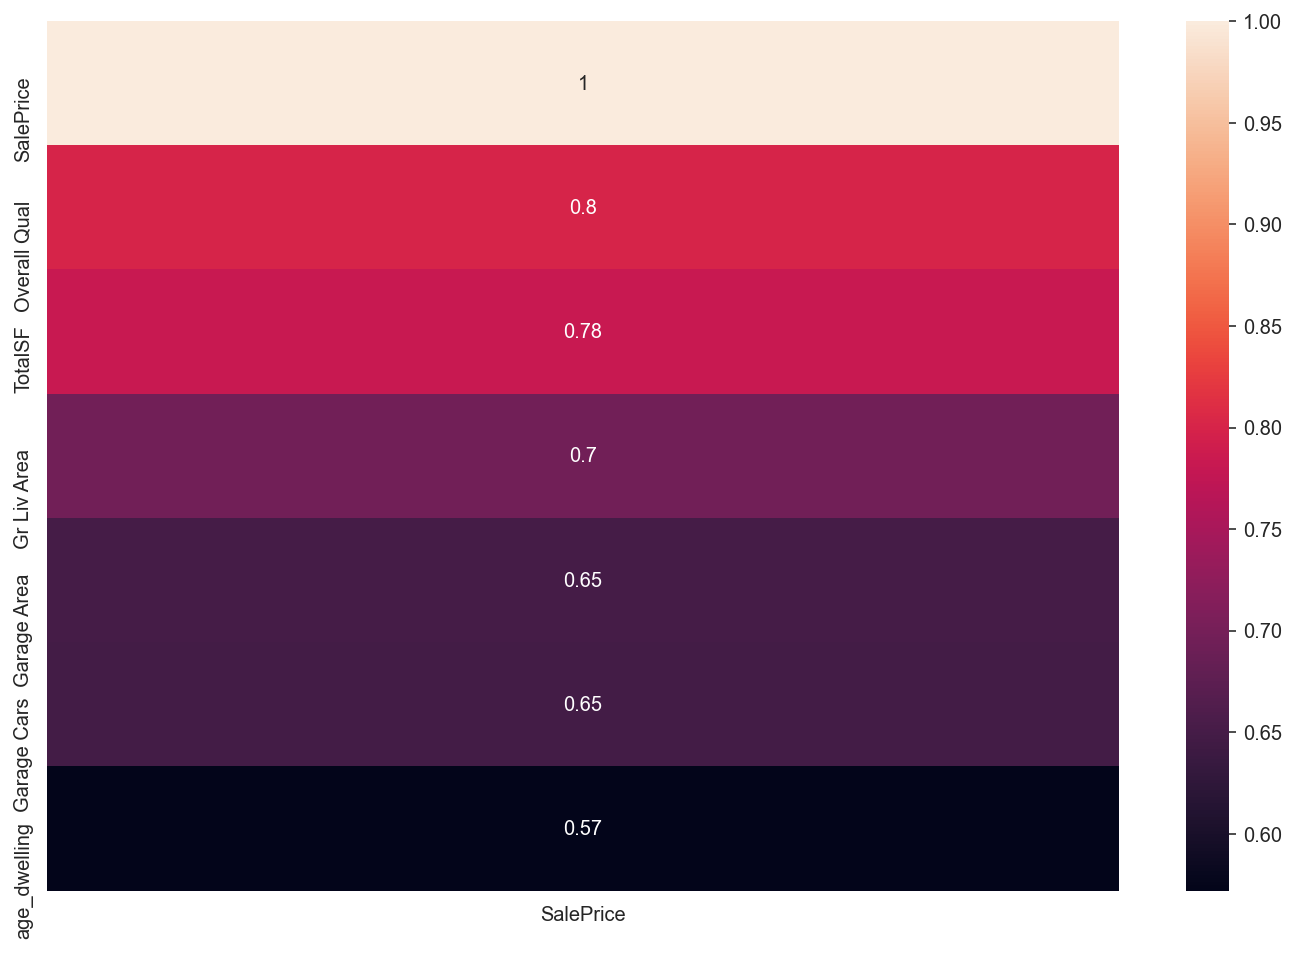

In [48]:
df_model1 = dummy_train[['SalePrice','Overall Qual','TotalSF','Gr Liv Area',
                         'Garage Area','Garage Cars','age_dwelling']]
corr = df_model1.corr()

#take absolute to see corelation most value in cate sales
top_corr = np.abs(df_model1.corr()[['SalePrice']]).sort_values('SalePrice', ascending=False) 
plt.figure(figsize = (12,8))
sns.heatmap(top_corr.head(20), annot = True)

In [49]:
#initiate the linear regression model and standard scaler
lr = LinearRegression()
ss = StandardScaler()

In [50]:
#Model1 pick columns
X = df_model1[['Overall Qual','TotalSF','Gr Liv Area','Garage Area','Garage Cars','age_dwelling']]
y = df_model1['SalePrice']

In [51]:
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
#transfrom data into same scale so it will not have bias 
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [53]:
#Fit model with train data
lr.fit(X_train_sc,y_train)

LinearRegression()

In [54]:
#score on train data
lr.score(X_train_sc,y_train)

0.7737124267629747

In [55]:
#unseen data score
cross_val_score(lr, X_train_sc, y_train, cv=5).mean()

0.7546003024812362

In [56]:
#score on test data
lr.score(X_test_sc,y_test)

0.834231273937069

In [57]:
#unseen data test score
cross_val_score(lr, X_test_sc, y_test, cv=5).mean()

0.8296869800197488

In [58]:
unseen_rmse = np.abs(cross_val_score(lr, X_train_sc, y_train, cv=5,scoring='neg_root_mean_squared_error')).mean()

In [59]:
y_preds = lr.predict(X_train_sc)

In [60]:
#RMSE of model 1 ##score is 35034.41179 which is underfit need to do more complexity
np.sqrt(mean_squared_error(y_train, y_preds))

37945.91279929144

In [61]:
print(f"MSE : {mean_squared_error(y_train, y_preds)}" )
print(f"RMSE train data: {np.sqrt(mean_squared_error(y_train, y_preds))}" )
print(f"RMSE unseen data: {unseen_rmse}" )

MSE : 1439892298.1714296
RMSE train data: 37945.91279929144
RMSE unseen data: 38781.41838276256


-----------------------

Model 1 - submission

In [62]:
X_ans = clean_test[['Overall Qual','TotalSF','Gr Liv Area','Garage Area','Garage Cars','age_dwelling']]
X_ans_sc =  ss.transform(X_ans)

In [63]:
predicts_ans = lr.predict(X_ans_sc)

In [64]:
index = clean_test['Id']
predicts_ans = pd.Series(predicts_ans)

df1 = pd.concat([index,predicts_ans],axis=1)
df1.rename(columns = {0:"SalePrice"},inplace=True)
df1.to_csv('ver2_submission_1.csv',index=False)

Kaggle score = 35034.41179<br>
RMSE train data: 37945.91279929144<br>
RMSE unseen data: 38781.41838276256<br>
**As the test score is lower than training score => The model is underfit need to add complexity to model**

------------------------------------------

Model 2 - Use all feature (both numerical and categorical)

In [65]:
df_model2 = dummy_train

X = df_model2[all_feature]
y = df_model2['SalePrice']

In [66]:
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [67]:
#initiate model
lr2 = LinearRegression()

In [68]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
#fit model
lr2.fit(X_train,y_train)

LinearRegression()

In [70]:
#score on train data
lr2.score(X_train,y_train)

0.9293778473131193

In [71]:
#unseen data train score
cross_val_score(lr2, X_train, y_train, cv=5).mean()

0.8287694996471447

In [72]:
#score on test data
lr2.score(X_test,y_test)

0.919696402455881

In [73]:
#unseen data test score
cross_val_score(lr2, X_test, y_test, cv=5).mean() 

0.8377190788770695

In [74]:
rmse = np.abs(cross_val_score(lr2, X_train, y_train, cv=5,scoring='neg_root_mean_squared_error')).mean()

In [75]:
#Just want to see which top corelation is effect in model the most
coef_feature = pd.DataFrame({'feature':X_train.columns, 
              'coefficient': lr2.coef_}).sort_values(by='coefficient')

In [76]:
coef_feature.tail()

feature    coefficient
127     Roof Matl_Tar&Grv   86768.572703
128     Roof Matl_WdShake   87910.149726
70   Neighborhood_GrnHill  105441.560706
126     Roof Matl_Membran  123030.911921
129     Roof Matl_WdShngl  129935.671388

In [77]:
y_train_preds = lr2.predict(X_train)
y_test_preds = lr2.predict(X_test)

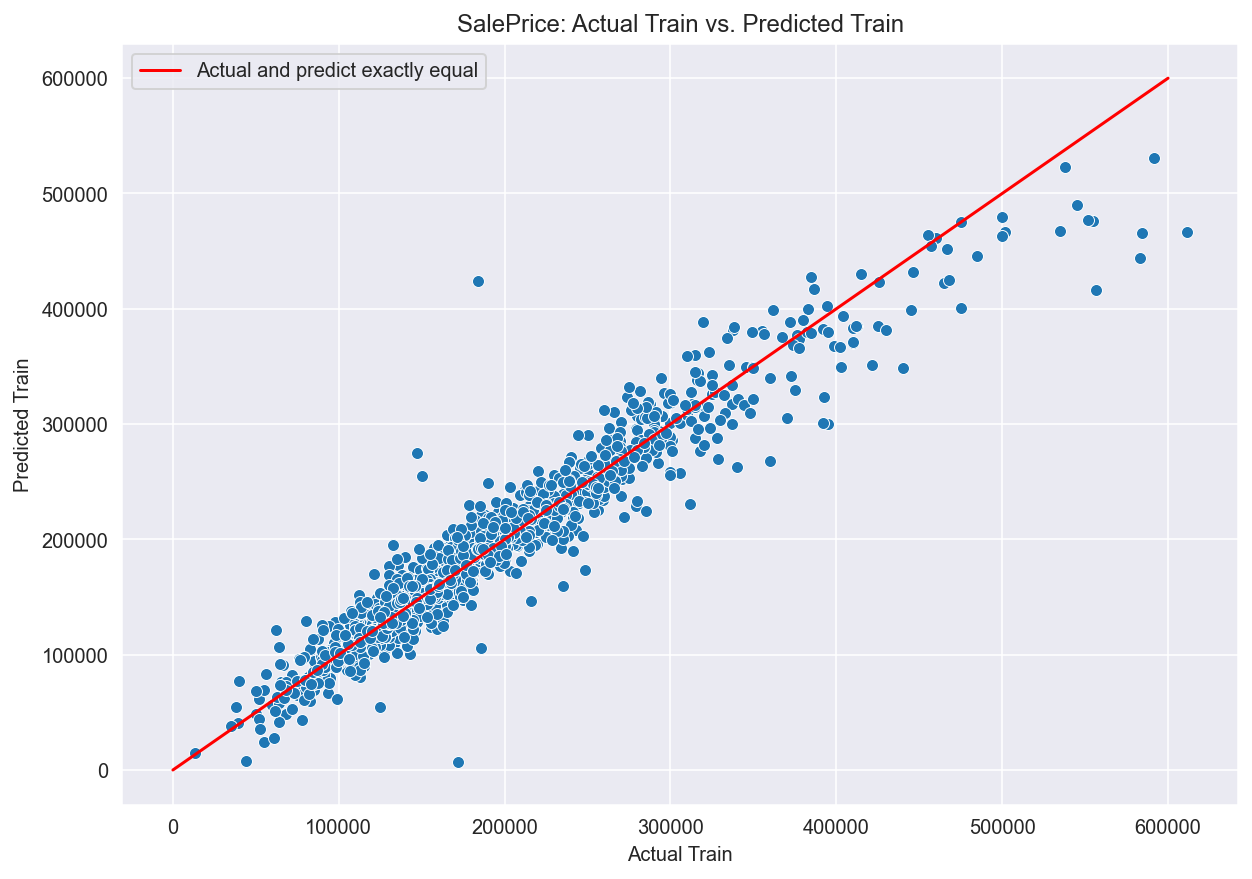

In [78]:
plt.figure(figsize= (10,7))
#plt.scatter(y_train, y_train_preds,  color='red', alpha=0.5, s=5)
sns.scatterplot(y_train, y_train_preds)

x_axis = np.linspace(0,600000,100)
y_axis = x_axis
plt.plot(x_axis,y_axis,color='red',label='Actual and predict exactly equal');

plt.xlabel('Actual Train')
plt.ylabel('Predicted Train')
plt.title('SalePrice: Actual Train vs. Predicted Train')
plt.legend(loc = 'upper left')

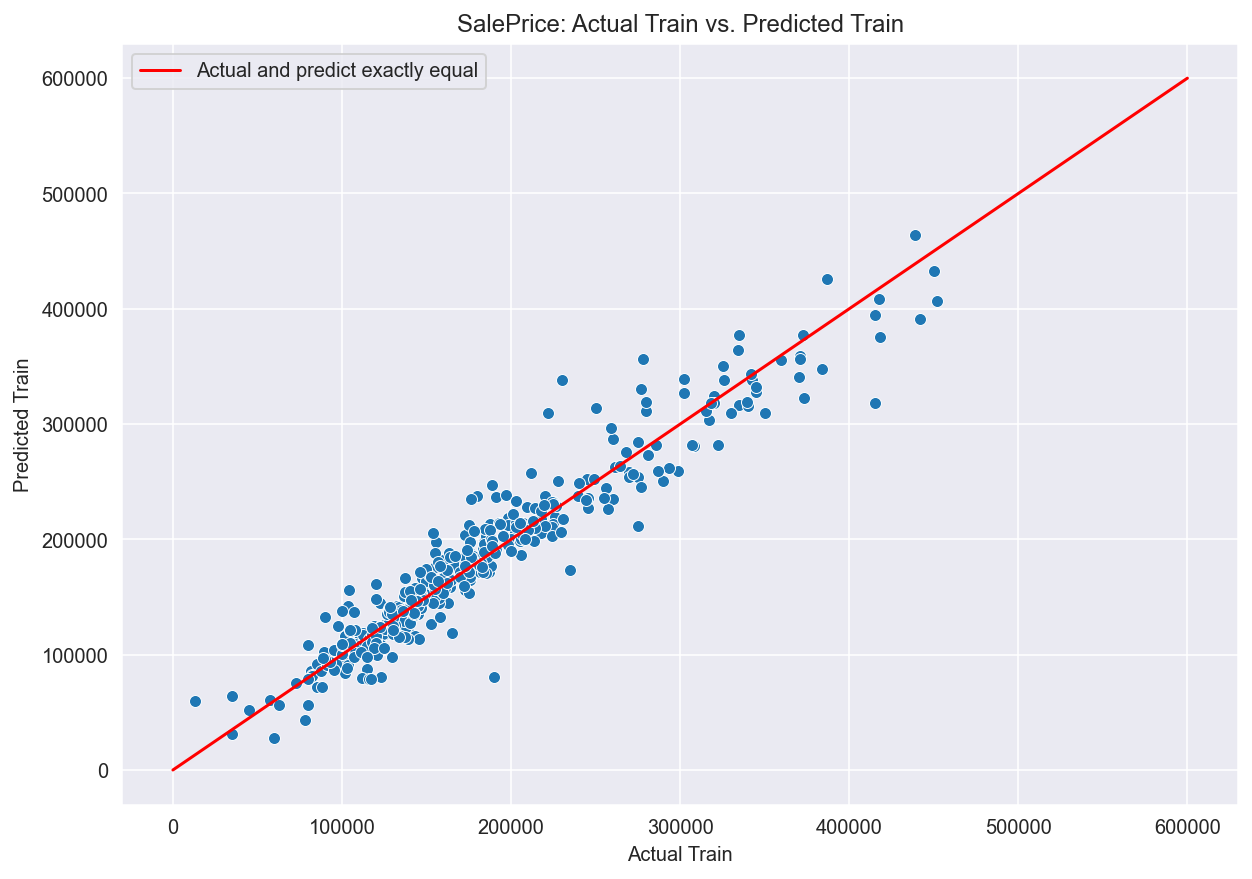

In [79]:
plt.figure(figsize= (10,7))
#plt.scatter(y_train, y_train_preds,  color='red', alpha=0.5, s=5)
sns.scatterplot(y_test, y_test_preds)

x_axis = np.linspace(0,600000,100)
y_axis = x_axis
plt.plot(x_axis,y_axis,color='red',label='Actual and predict exactly equal');

plt.xlabel('Actual Train')
plt.ylabel('Predicted Train')
plt.title('SalePrice: Actual Train vs. Predicted Train')
plt.legend(loc = 'upper left')

In [80]:
y_preds = lr2.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_preds))

21198.49981227562

-------------------------

Model 2 - submission

In [81]:
X_ans = dummy_test[all_feature]

In [82]:
predicts_ans = lr2.predict(X_ans)

In [83]:
index = clean_test['Id']
predicts_ans = pd.Series(predicts_ans)

df2 = pd.concat([index,predicts_ans],axis=1)
df2.rename(columns = {0:"SalePrice"},inplace=True)
df2.to_csv('ver2_submission_2.csv',index=False)

Kaggle score = 28541.41111<br>
RMSE on train data = 21166.56021499801<br>
RMSE (unseen data) = 31574.920304885327<br>


cross_val_score on train data = 0.8283771182419283<br>
cross_val_score on test data = 0.8303634769363708<br>

Score is around 80% and as you can see from the graph it's still have some data that predict quite far from the actual price.
Furthurmore the score of RMSE on train data is lower than the kaggle score. This is show it's overfit

--------------------------------

Model 2.2: Scale the data 
    Use all features as model 2 but scale the data

In [84]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [85]:
lr3 = LinearRegression()

In [86]:
lr3.fit(X_train_sc,y_train)

LinearRegression()

In [87]:
lr3.score(X_train_sc,y_train)

0.9292934744328101

In [88]:
cross_val_score(lr3, X_train_sc, y_train, cv=5).mean()

-7.45161593083671e+24

In [89]:
lr3.score(X_test_sc,y_test)

-6.318136005937366e+21

In [90]:
cross_val_score(lr3, X_test_sc, y_test, cv=5).mean()

-1.6379269790401526e+23

In [91]:
unseen_rmse = np.abs(cross_val_score(lr2, X_train_sc, y_train, cv=5,scoring='neg_root_mean_squared_error')).mean()
unseen_rmse

1.902766033967553e+17

As you can see the data that scale to the StandardScaler() and fit to model is worse than the baseline model as you can see from the cross_val_score is negative. <br>
Therefore, the model 2 can be skewed by some categorical value.

-----------------------------------

### Ridge Model:

Model 3: Ridge with all feature

In [92]:
df_model3 = dummy_train

X = df_model3[all_feature]
y = df_model3['SalePrice']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [95]:
r_alphas = np.linspace(0.1,10,100)
ridge = RidgeCV(alphas=r_alphas)

In [96]:
ridge.fit(X_train_sc,y_train)
best_ridge_alpha = ridge.alpha_

In [97]:
ridge_r2_score_seen = ridge.score(X_train_sc,y_train)
ridge_r2_score_seen

0.9293467612922854

In [98]:
ridge_r2_score = cross_val_score(ridge,X_train_sc,y_train,cv=10).mean()
ridge_rmse_score = np.abs(cross_val_score(ridge,X_train_sc,y_train,cv=10,scoring='neg_root_mean_squared_error')).mean()

In [99]:
ridge_rmse_score

30000.454044968064

In [100]:
cross_val_score(ridge,X_train_sc,y_train,cv=10)

array([0.91060437, 0.91909713, 0.87908852, 0.8867353 , 0.87505877,
       0.93097112, 0.88008203, 0.70558836, 0.51605174, 0.89221331])

In [101]:
print(f'Ridge R2 = {ridge_r2_score} \nRidge RMSE = {ridge_rmse_score}')

Ridge R2 = 0.8395490648532556 
Ridge RMSE = 30000.454044968064


In [102]:
## 27972.84629 public // still overfit

y_preds = ridge.predict(X_train_sc)
rmse = np.sqrt(mean_squared_error(y_train, y_preds))
rmse

21203.164811016064

-----------------------

Model 3 - submission

In [103]:
X_ans = dummy_test[all_feature]
X_ans_sc = ss.transform(X_ans)

In [104]:
index = clean_test['Id']
predicts_ans = ridge.predict(X_ans_sc)
predicts_ans = pd.Series(predicts_ans)

In [105]:
index.head()

0    2658
1    2718
2    2414
3    1989
4     625
Name: Id, dtype: int64

In [106]:
df_ridge = pd.concat([index,predicts_ans],axis=1)
df_ridge.rename(columns = {0:"SalePrice"},inplace=True)
df_ridge.to_csv('ver2_submission_3.csv',index=False)

**=> If I don't drop columns that already use score will be**<br>
**drop(columns=['Total Bsmt SF', '1st Flr SF', '2nd Flr SF','Yr Sold','Year Built','Mo Sold'],inplace=True))**

Kaggle score = 27972.84629<br>
RMSE on train data = 21166.56021499801<br>
RMSE on train data (unseen data): 30068.057405208972<br>
<br>

**Drop used columns score**<br>
Kaggle score = 28164.07401 <br>
Ridge R2 = 0.9369587248876193<br>
Ridge RMSE = 15059.404588343645<br>
Ridge RMSE Unseen = 30000.454044968064<br>

As the test score is much much higher than training score => The model is overfit need to add varience to model
This might be happen because I use all of the columns

----------------

### Lasso

Use lasso to do feature selections

In [107]:
df_model4 = dummy_train

X = df_model4[all_feature]
y = df_model4['SalePrice']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [110]:
l_alphas = np.arange(0.001, 0.15, 0.0025)

In [111]:
#alpha bset is 444.132
lasso = LassoCV()
lasso.fit(X_train_sc, y_train)
l_alphas_best = lasso.alpha_
l_alphas_best 

634.4462391046669

In [112]:
lasso.score(X_train_sc, y_train)

0.9212278873408017

In [113]:
lasso_r2_score = cross_val_score(lasso,X_train_sc,y_train,cv=10).mean()
lasso_rmse_score = np.abs(cross_val_score(lasso,X_train_sc,y_train,cv=10,scoring='neg_root_mean_squared_error')).mean()

In [114]:
print(f'Lasso R2 = {lasso_r2_score} \nLasso RMSE Unseen data = {lasso_rmse_score}')

Lasso R2 = 0.8507965784598073 
Lasso RMSE Unseen data = 28872.54746232496


In [115]:
lasso.coef_

array([-1.25327497e+03,  4.36401914e+02,  4.27512063e+03,  1.18738049e+04,
        4.31776767e+03,  1.85635158e+03,  1.87630542e+03,  5.91808614e+03,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.39179806e+04,
        2.21324215e+03, -6.41105277e+01,  2.26522682e+03,  7.20568397e+02,
       -0.00000000e+00, -6.56085752e+02,  3.86573583e+02,  2.61293053e+03,
       -0.00000000e+00,  1.29480404e+03,  3.54072524e+03,  6.42838239e+02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.03533782e+03,
       -0.00000000e+00, -6.90673403e+03,  1.23652985e+04, -6.47060506e+03,
       -0.00000000e+00, -2.69446500e+02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -5.24923805e+02, -3.73106644e+02,
        1.25643366e-11,  0.00000000e+00,  5.69747825e+02, -0.00000000e+00,
       -0.00000000e+00, -5.39849683e+02,  1.71559338e+03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [116]:
#Take lasso coef into dataframe with name feature to do some plot later
df_lasso_coef = pd.DataFrame(lasso.coef_,columns=["lasso_coef"])

In [117]:
df_lasso_coef['feature'] = df_model4[all_feature].columns

In [118]:
df_lasso_coef

lasso_coef          feature
0    -1253.274971      MS SubClass
1      436.401914     Lot Frontage
2     4275.120632         Lot Area
3    11873.804856     Overall Qual
4     4317.767670     Overall Cond
..            ...              ...
270    -27.020176  Sale Type_ConLI
271      0.000000  Sale Type_ConLw
272   3374.375503    Sale Type_New
273    260.916414    Sale Type_Oth
274     -0.000000    Sale Type_WD 

[275 rows x 2 columns]

In [119]:
X_train_sc.shape

(1640, 275)

In [120]:
#There is 168 feature out of 275 feature that not significant 
(lasso.coef_==0).sum()

168

In [121]:
#Only 107 feature which actually effect on this model to predict sale price
(lasso.coef_!=0).sum()

107

-----

Model 4 - submission

In [122]:
X_ans = dummy_test[all_feature]
X_ans_sc = ss.transform(X_ans)

In [123]:
predicts_ans = lasso.predict(X_ans_sc)
predicts_ans[:10]

array([140877.73589996, 162680.5222784 , 219169.73004528, 109988.20374418,
       180059.84661521,  85056.67599928, 106377.12171251, 148820.21754598,
       178358.44167488, 167558.36620797])

In [124]:
index = clean_test['Id']
predicts_ans = pd.Series(predicts_ans)

df_lasso = pd.concat([index,predicts_ans],axis=1)
df_lasso.rename(columns = {0:"SalePrice"},inplace=True)
df_lasso.to_csv('ver2_submission_4.csv',index=False)

In [125]:
### 28301.48136
y_preds = lasso.predict(X_train_sc)
np.sqrt(mean_squared_error(y_train, y_preds))

22388.28869951652

Kaggle score = 28301.48136 <br>
Lasso R2 = 0.9293751847100279<br>
Lasso RMSE = 22388.28869951652<br>
Lasso RMSE Unseen = 17959.785798590885<br>

Although the score of lasso slightly drop when compare with Ridge but it's quite work better on unseen data. As you can see kaggle score and Lasso RMSE score different is smaller than the Rasso.

-----

**Plotting the coeficient to see how it's effect on sale price, I will conclude it in conclusion once again**

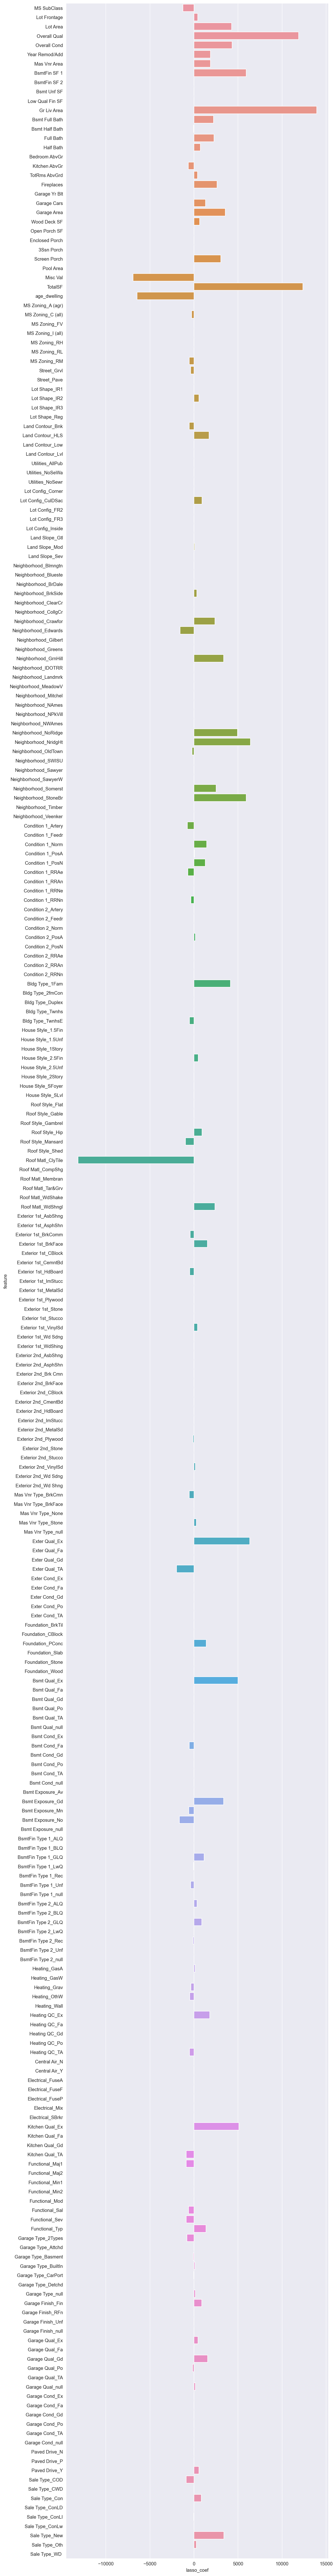

In [126]:
plt.figure(figsize=(10, 100))
ax = sns.barplot(x="lasso_coef", y="feature",  data=df_lasso_coef)

---------------------------

### Model 5: Cut off the outlier

Try to improve model by cut outliers sale price which is use mathetics formular as below to drop row which sale price is outlier. Which is sale price above 3rd qualtile 1.5 times and below 1st qualtile 1.5 times will determine as the outlier. I will drop it and see performance will improve or not.

<AxesSubplot:ylabel='SalePrice'>

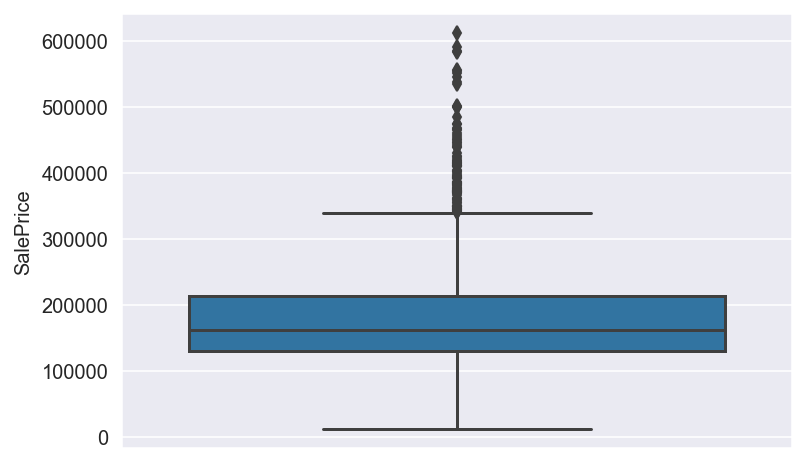

In [127]:
#plotting to see the distribution
sns.boxplot(y=clean_train['SalePrice'])

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

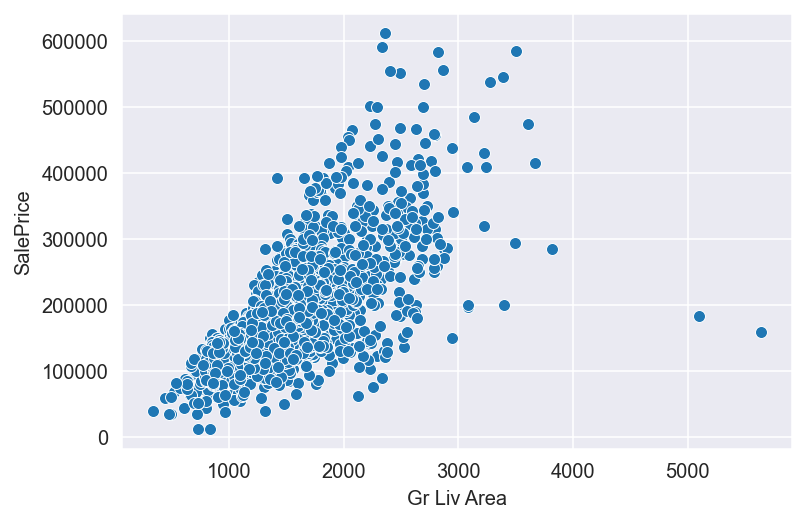

In [128]:
#Due to lasso I see that the Gr Liv area is most effect on sales price, So I quickly plot to see it.
sns.scatterplot(x=clean_train['Gr Liv Area'],y=clean_train['SalePrice'])

In [129]:
#Sort sale price to find outlier
sale_price = list(clean_train['SalePrice'])
sale_price = np.sort(sale_price)
sale_price[:10]

array([12789, 13100, 34900, 35000, 35311, 37900, 39300, 40000, 44000,
       45000])

In [130]:
#Looking for 1st quartile ,3rd quartile, Interquartile
Q1 = np.percentile(sale_price, 25, interpolation = 'midpoint')  
Q2 = np.percentile(sale_price, 50, interpolation = 'midpoint')  
Q3 = np.percentile(sale_price, 75, interpolation = 'midpoint')  
IQR = Q3 - Q1
print(Q1,"= Q1", Q3, "= Q3")
print('Interquartile range is', IQR) 

129825.0 = Q1 214000.0 = Q3
Interquartile range is 84175.0


In [131]:
#Sale price below 3562.5 and above 340262.5 consider it as the outlier
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print(low_lim, up_lim)

3562.5 340262.5


In [132]:
#take the outlier sale price in list outlier
outlier =[] 
for x in sale_price: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x) 
print('Outlier in the SalePrice is', len(outlier), "All data have", len(sale_price)) 

Outlier in the SalePrice is 94 All data have 2051


In [133]:
df_no_outlier = dummy_train
df_no_outlier.shape

(2051, 276)

In [134]:
df_no_outlier['SalePrice']

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: SalePrice, Length: 2051, dtype: int64

In [135]:
#drop out sale price which is outlier
for index, row in df_no_outlier.iterrows():
    if df_no_outlier['SalePrice'][index] in outlier:
        df_no_outlier.drop(axis=0,index=index,inplace=True)
df_no_outlier.shape

(1957, 276)

In [136]:
#Check number of rows that drop correctly
2051-1957

94

In [137]:
#Determine model 5
df_model5 = df_no_outlier

X = df_model5[all_feature]
y = df_model5['SalePrice']

In [138]:
#Fit it to Ridge model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)
r_alphas = np.linspace(0.1,10,100)
ridge = RidgeCV(alphas=r_alphas)
ridge.fit(X_train_sc,y_train)
best_ridge_alpha = ridge.alpha_
ridge_r2_score = cross_val_score(ridge,X_train_sc,y_train,cv=10).mean() 
ridge_rmse_score = np.abs(cross_val_score(ridge,X_train_sc,y_train,cv=10,scoring='neg_root_mean_squared_error')).mean()

X_ans = dummy_test[all_feature]
X_ans_sc = ss.transform(X_ans)

predicts_ans = ridge.predict(X_ans_sc)

index = clean_test['Id']
predicts_ans = pd.Series(predicts_ans)

df_ridge2 = pd.concat([index,predicts_ans],axis=1)
df_ridge2.rename(columns = {0:"SalePrice"},inplace=True)
df_ridge2.to_csv('ver2_submission_5.csv',index=False)

In [139]:
y_preds = ridge.predict(X_train_sc)
rmse_train = np.sqrt(mean_squared_error(y_train, y_preds))
rmse_train

#y_preds = lasso.predict(X_train_sc)
#np.sqrt(mean_squared_error(y_train, y_preds))

15059.404588343645

In [140]:
#29141.04554
print(f'Ridge R2 = {ridge_r2_score} \nRidge RMSE = {ridge_rmse_score} \nRMSE score on train data = {rmse_train}')

Ridge R2 = 0.8968027670144234 
Ridge RMSE = 18997.127083070118 
RMSE score on train data = 15059.404588343645


The model is even more overfit after we have cut the outlier. So, I will not use this model<br>
RMSE on train is 15059.4 and on unseen data 18997.13 -> Overfit

I try on lasso model too. It's quite no significantly change

---------------------------------------

# Conclusion and recommendation

### Here is the score on kaggle

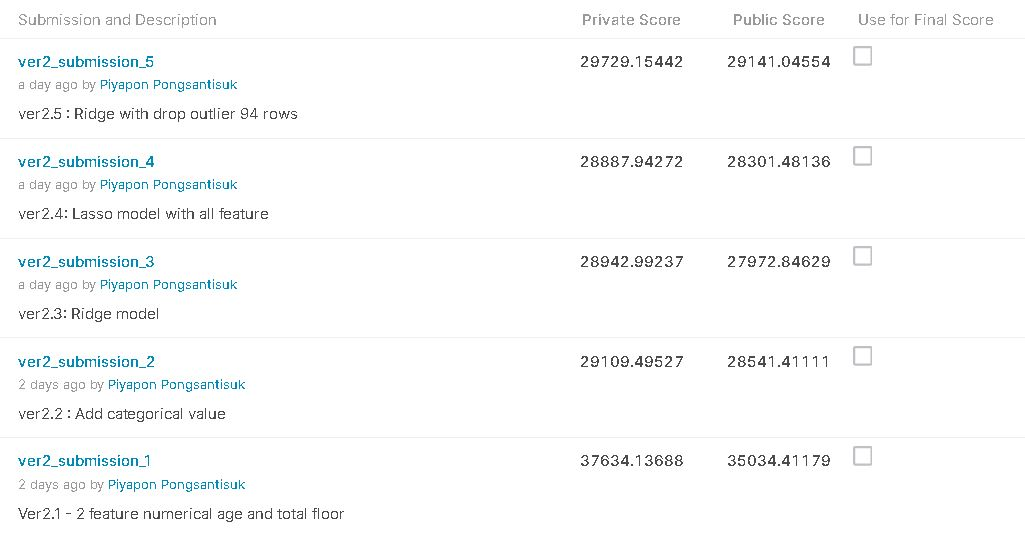

As you can see from the model score (R2 and RMSE in each model) and kaggle score
- The best model to predict test file is Ridge model
- However, I recommend to use Lasso model to predict the Sale price of the house although the accuracy a bit lower than ridge but it's work more efficient on the unseen data (as you can see from the cross val score)

### Business recommendation

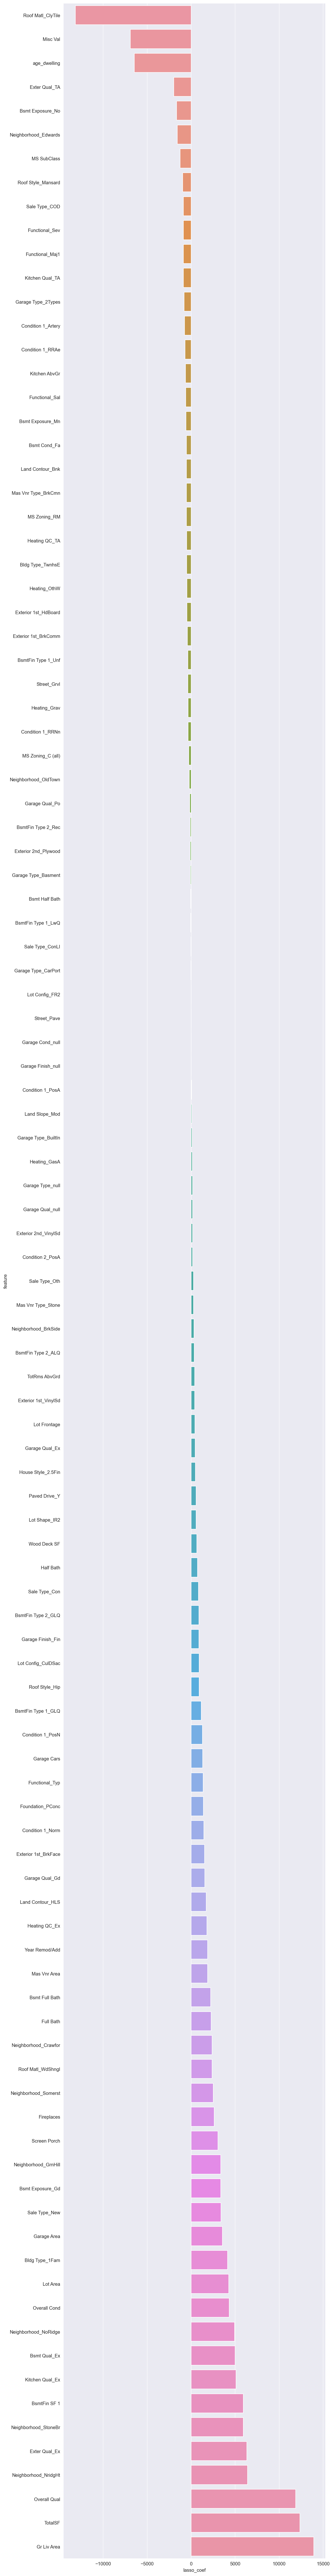

In [141]:
df_lasso_coef_nonzero = df_lasso_coef[df_lasso_coef['lasso_coef']!=0]
df_lasso_coef_nonzero = df_lasso_coef_nonzero.sort_values('lasso_coef') 
plt.figure(figsize=(10, 100))
ax2 = sns.barplot(x="lasso_coef", y="feature",  data=df_lasso_coef_nonzero)

__The houses that have high sale prices should have property:__
1. Having a big living area (Gr Liv Area)
2. Having a big house area which is first floor area/ second floor area/ basement area (ToTalSF)
3. Having a high grade material and finish quality (Overall Qual)
4. Newer or being newly renovated
5. Located in Northridge Heights (Neighborhood physical area in Ames)

__Things that be awared or it will be drop the sale price of the house__
1. Roof material -  ClyTile Clay or Tile will significantly drop the price **don't use it**. You can use others there is no much different (Roof Matl_ClyTile)
2. Miscellaneous feature or having severly damaged in house (Misc Val)

**In case owners want to improve the sale price, need to improve house quality by fixing any damaged in house. Also change the roof material if it's clay tile into another material**

Let's take a quick look at some neighborhoods, As it's quite effect significantly on Northridge Heights

In [142]:
neighborhoods = clean_train[['Neighborhood','SalePrice']].groupby('Neighborhood').mean().sort_values(by= 'SalePrice',ascending = False)
top_neighborhoods = neighborhoods.iloc[:5]
bottom_neighborhoods = neighborhoods.iloc[-5:]

In [143]:
plot = pd.concat([top_neighborhoods,bottom_neighborhoods])
plot.rename(index = {
    'MeadowV' : 'Meadow Village',
    'IDOTRR' :'Iowa DOT and Rail Road',
    'BrDale':'Briardale',
    'OldTown':'Old Town',
    'BrkSide' : 'Brookside',
    'Veenker': 'Veenker',
    'GrnHill' : 'Green Hill',
    'NoRidge':'Northridge',
    'NridgHt':'Northridge Heights',
    'StoneBr':'Stone Brook', 
}, inplace=True)

In [144]:
#Mean of sale price
y = (clean_train[['Neighborhood','SalePrice']].mean()).astype(int)
y

SalePrice    181469
dtype: int32

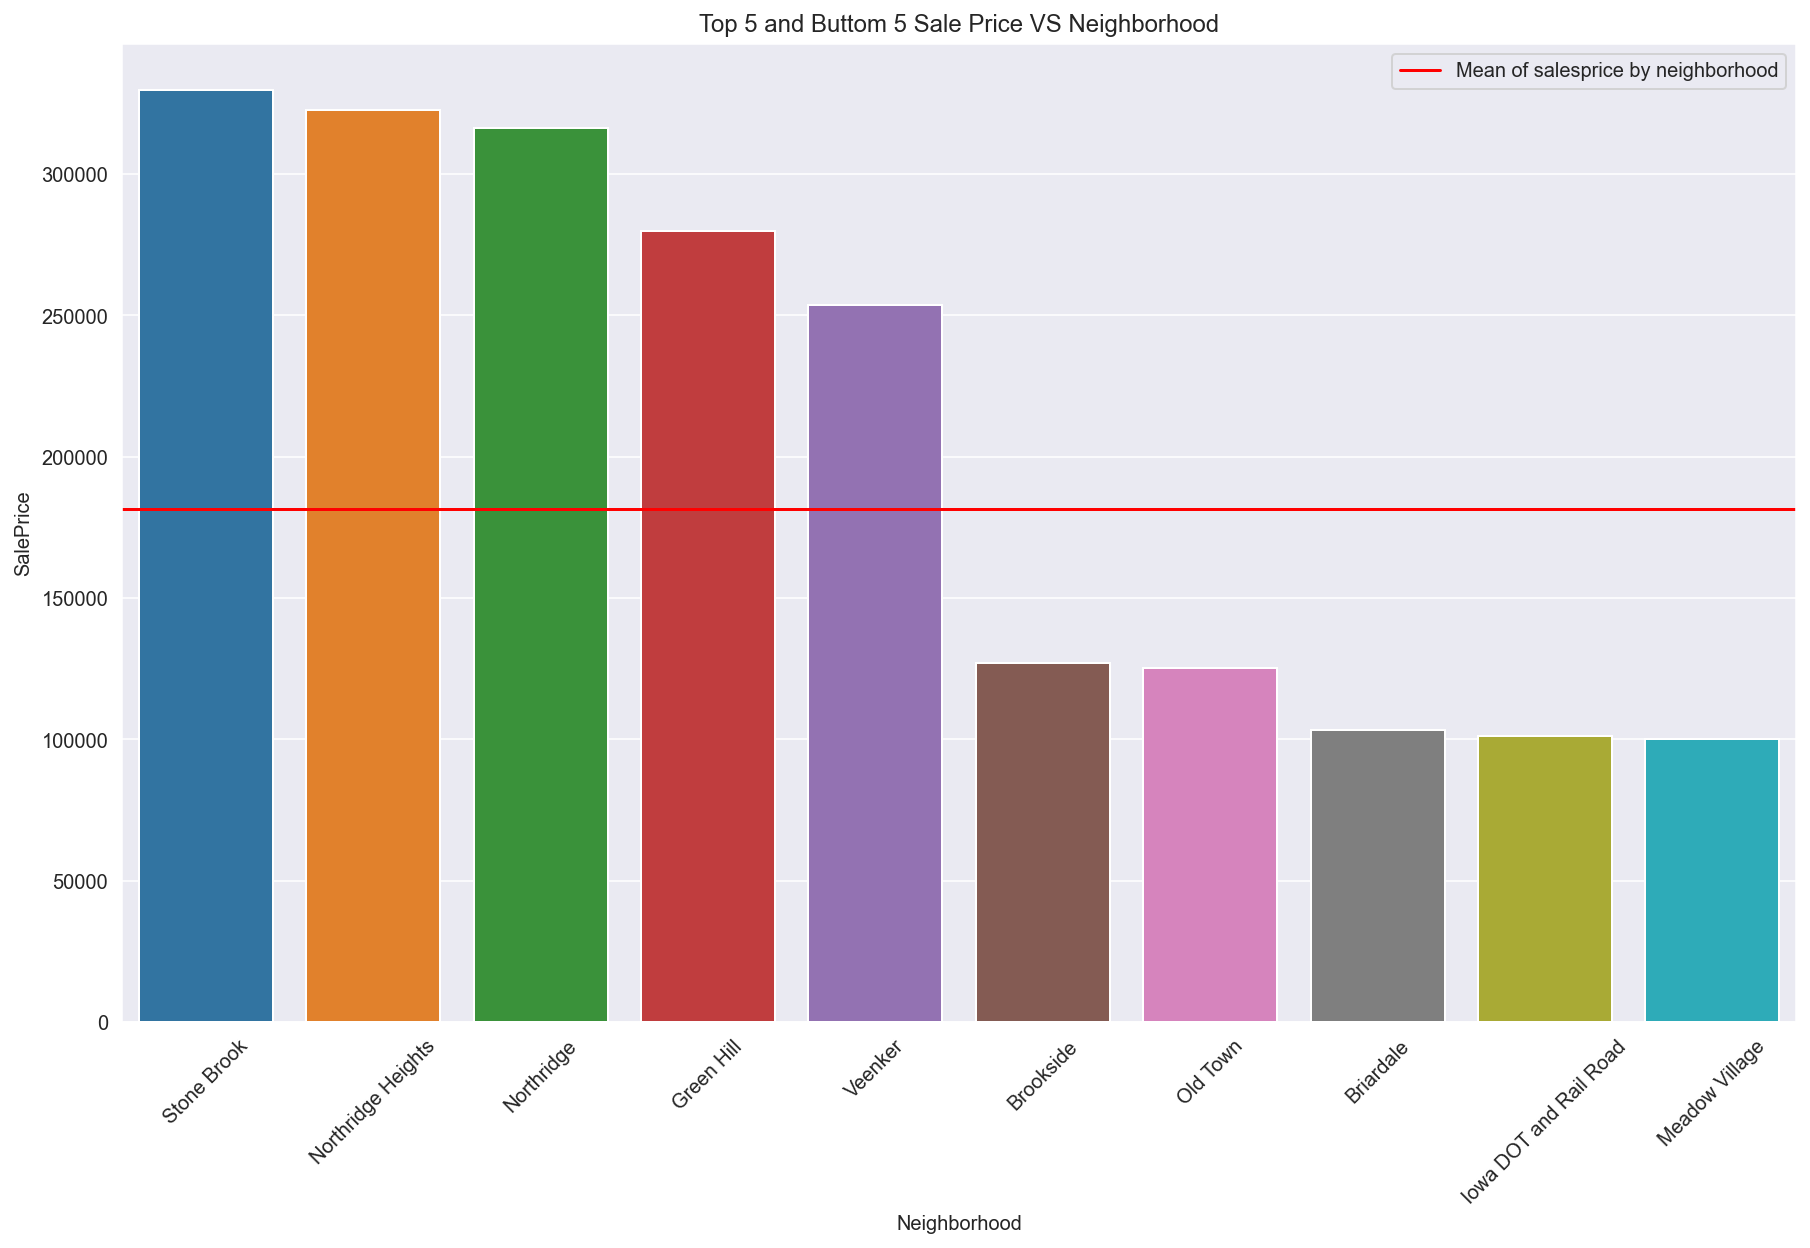

In [145]:
plt.figure(figsize=(15,9))
ax = sns.barplot(plot.index,plot['SalePrice'])
plt.title('Top 5 and Buttom 5 Sale Price VS Neighborhood')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

#mean_neighbor = (clean_train[['Neighborhood','SalePrice']].mean()).astype(int)
plt.axhline(y=181469, xmin=0, xmax=1,color='red',label = 'Mean of salesprice by neighborhood')
plt.legend()
#plt.plot(50000,50000,color='red',label='Actual and predict exactly equal');

**If you are looking to invest to create new house for sale, I recommend to build in 5 this area. Stone Brook, Northrdige Heights, Northridge, Green Hill, Veenker**

### Conclusion

The reason why I use lasso model because it's work better on unseen data as you can see on cross_val score. Although RMSE of train model is a bit better but lasso do a better performance on prediction on unseen data

In my opinion these model are generalize. As you can see from the lasso coefficient which top feature that effect the sale price is very general. Only the neighborhood that is specific in this city. However, I think it can be adapt neighborhood with the location in other city.

About the error of prediction is around 21,000 - 22,000. Therefore, this model  works great on the price between 3,560 - 340,000 dollars (approximately). If it's out of this range the error of price prediction will increase and prediction can be far from the actual price. (As I do the outlier the price of this range can do a wrong decision)



---